In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib notebook

In [3]:
# Loaading datasets
df_gh = pd.read_csv("Ghana.csv")
df_ng = pd.read_csv("nigeria.csv")


In [4]:
# df_gh.head()

In [5]:
# Cleaning of datasets

# Removing of unwanted columns from df_ng
df_ng_new= df_ng[['DATE','DEATH_CASE','CONFIRMED_CASE']]

# Removing unwanted columns from df_gh 
df_gh_new = df_gh[['date','death','confirmed']]

# Renaming each column
df_ng_new = df_ng_new.rename(columns={'DATE':'Date_ng','DEATH_CASE':'Death_Cases_ng','CONFIRMED_CASE':'Confirmed_Cases_ng'})
df_gh_new = df_gh_new.rename(columns={'date':'Date_gh','death':'Death_Cases_gh','confirmed':'Confirmed_Cases_gh'})

In [6]:
# Extracting the months column from the dates
df_ng_new['Month_ng'] = df_ng_new['Date_ng'].str.extract("(?:[\d]{1,2})(?:\/)([\d]{1,2})(?:\/)(?:[\d]{1,4})")
df_gh_new['Month_gh'] = df_gh_new['Date_gh'].str.extract("([\d]{1,2})(?:\/)(?:[\d]{1,2})(?:\/)(?:[\d]{1,4})")

In [7]:
# Analayzing the datasets

# Grouping the data based on months: Returns a Series
# Nigeria
covid_ng_cases = df_ng_new.groupby('Month_ng').sum()['Confirmed_Cases_ng']
covid_ng_deaths = df_ng_new.groupby('Month_ng').sum()['Death_Cases_ng']

#Ghana
covid_gh_cases = df_gh_new.groupby('Month_gh').sum()['Confirmed_Cases_gh']
covid_gh_deaths = df_gh_new.groupby('Month_gh').sum()['Death_Cases_gh']


In [9]:
# Creating a new dataframe for the grouped data for the 2 regions
ng_fin = pd.DataFrame([covid_ng_cases,covid_ng_deaths])
gh_fin = pd.DataFrame([covid_gh_cases,covid_gh_deaths])

# Transposing the dataframes
ng_fin = ng_fin.T
gh_fin = gh_fin.T
ng_fin = ng_fin.reset_index()
gh_fin = gh_fin.reset_index()

In [11]:
# Merging the two DataFrames
final_df = pd.merge(ng_fin,gh_fin,left_on=ng_fin['Month_ng'],right_on=gh_fin['Month_gh'], how='inner')

# Final Data Cleaning before visualization
# Dropping unwanted columns
final_df.drop('key_0',axis=1, inplace = True)
final_df['Month']=final_df['Month_ng']
final_df.drop('Month_ng',axis=1, inplace = True)
final_df.drop('Month_gh',axis=1, inplace = True)


<IPython.core.display.Javascript object>


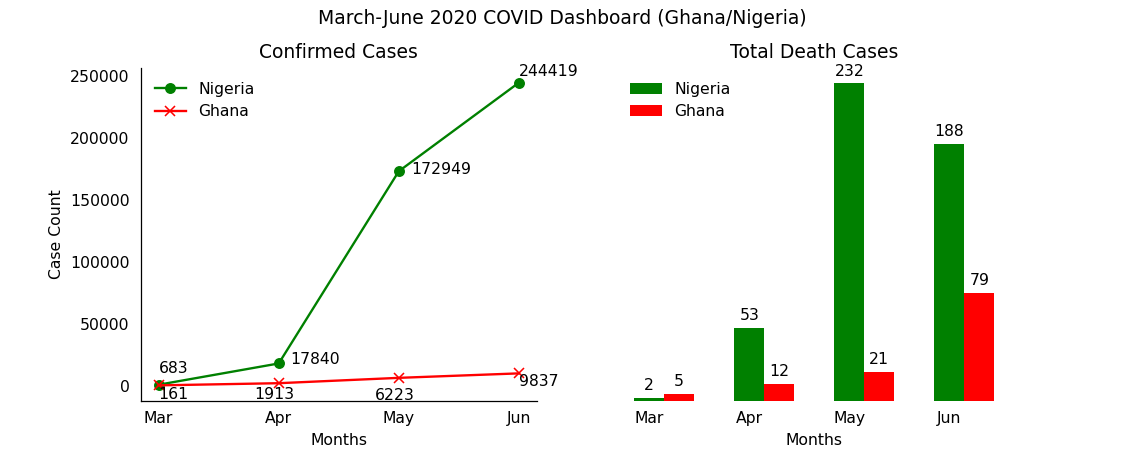

<ipython-input-12-8bc7c655b932>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lab)
<ipython-input-12-8bc7c655b932>:71: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(lab)


In [12]:
### Visualizing the Data 

#Creating subplots 
fig=plt.figure(figsize = (10,4))

#Creating a line graph
lab = ['Mar','Apr', 'May','Jun']
ax = plt.subplot(1,2,1)
ax.plot(final_df['Month'],final_df['Confirmed_Cases_ng'], "-o", label = 'Nigeria', color = 'green' )
ax.plot(final_df['Month'],final_df['Confirmed_Cases_gh'], "-x", label = 'Ghana', color = 'red' )

# Removing spines 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#labelling the axes
ax.set_xlabel('Months')
ax.set_ylabel('Case Count')
ax.set_title('Confirmed Cases')

# Inline labelling for the line graph
ax.text(0,-11000,'161')
ax.text(0.8,-11000,'1913')
ax.text(1.8,-11500,'6223')
ax.text(0,10000,'683')
ax.text(1.1,17000,'17840')
ax.text(2.1,170500,'172949')
ax.text(3,6,'9837')
ax.text(3,250000,'244419')

# Setting and removing ticks and ticklabels
ax.set_xticklabels(lab)
ax.tick_params(left=False, bottom = False)

# Giving the entire subplots a main title
fig.suptitle("March-June 2020 COVID Dashboard (Ghana/Nigeria)", fontsize=12)
fig.subplots_adjust(hspace=0.4, top=0.85)

# Creating a legend
ax.legend(frameon = False)

# Creating a bar graph
ax2 = plt.subplot(1,2,2)
lab = ['Mar','Apr', 'May','Jun']
pos = np.arange(len(final_df['Month']))
ng= ax2.bar(final_df['Month'],final_df['Death_Cases_ng'], width = 0.3, label = 'Nigeria', color = 'green')
new = []
for i in pos:
    new.append(i+0.3)
gh=ax2.bar(new,final_df['Death_Cases_gh'], width =0.3, label = 'Ghana', color = 'red')

# Labelling the graph directly
ax2.bar_label(ng, padding=3)
ax2.bar_label(gh, padding=3)

# Labelling the axis
ax2.set_xlabel('Months')
ax2.set_title('Total Death Cases')

# Removing spines
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

# Removing tick labels from the yaxis
ax2.axes.yaxis.set_ticklabels([])
ax2.tick_params(left = False, bottom= False)

# Setting tick labels
ax2.set_xticklabels(lab)
# Creating a legend
ax2.legend(loc=2, frameon = False)

